In [49]:
from __future__ import annotations

import os
import pickle

import numpy as np
from qtpyt.base.selfenergy import DataSelfEnergy as BaseDataSelfEnergy
from qtpyt.block_tridiag import greenfunction
from qtpyt.projector import expand

new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/AuBDA13CH2/run1'
os.chdir(new_path)

In [50]:
import matplotlib.pyplot as plt
import numpy as np


# Set global matplotlib rc parameters for better readability
plt.rcParams.update({
    'font.size': 14,           # Increase the font size
    'font.weight': 'bold',     # Make the font bold
    'axes.labelsize': 16,      # Axis label size
    'axes.titlesize': 18,      # Title size
    'axes.labelweight': 'bold',  # Bold axis labels
    'xtick.labelsize': 14,     # X-axis tick label size
    'ytick.labelsize': 14,     # Y-axis tick label size
    'xtick.major.width': 1.2,  # X-axis major tick width
    'ytick.major.width': 1.2,  # Y-axis major tick width
    'axes.linewidth': 1.5,     # Axis line width
})

In [51]:
class DataSelfEnergy(BaseDataSelfEnergy):
    """Wrapper"""

    def retarded(self, energy):
        return expand(S_identity, super().retarded(energy), idx_molecule)


def load(filename):
    return DataSelfEnergy(energies, np.load(filename))


In [52]:
data_folder = "./output/lowdin"
dmft_data_folder = "./output/lowdin/dmft/no_spin"
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
dmft_sigma_file = f"{dmft_data_folder}/dmft_sigma.npy"


In [53]:
de = 1e-3
energies = np.arange(-1.0, 1.0, de)
eta = 1e-3
nodes = [0, 810, 1116, 1278, 1584, 2394]
with open(f"{data_folder}/hs_list_ii.pkl", "rb") as f:
    hs_list_ii = pickle.load(f)
with open(f"{data_folder}/hs_list_ij.pkl", "rb") as f:
    hs_list_ij = pickle.load(f)
dmft_sigma = load(dmft_sigma_file)

# Transmission function calculation
imb = 2  # index of molecule block from the nodes list
S_molecule = hs_list_ii[imb][1]  # overlap of molecule
S_identity = np.eye(S_molecule.shape[0])
idx_molecule = (
    index_active_region - nodes[imb]
)  # indices of active region w.r.t molecule


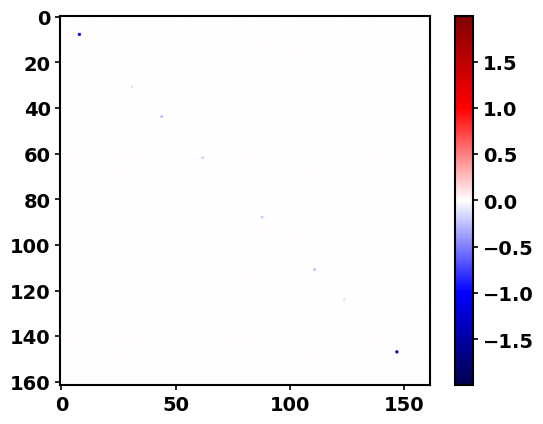

In [54]:
omega = -3
matrix_real = dmft_sigma.retarded(omega).real

plt.imshow(matrix_real, cmap='seismic', vmin=-np.max(np.abs(matrix_real)), vmax=np.max(np.abs(matrix_real)))
plt.colorbar()


In [55]:
ed_data_folder = "output/lowdin/ed"
ed_sigma_file = f"{ed_data_folder}/ed_sigma.npy"
ed_sigma = load(ed_sigma_file)

In [56]:
ed_sigma.retarded(0.0).shape

(162, 162)

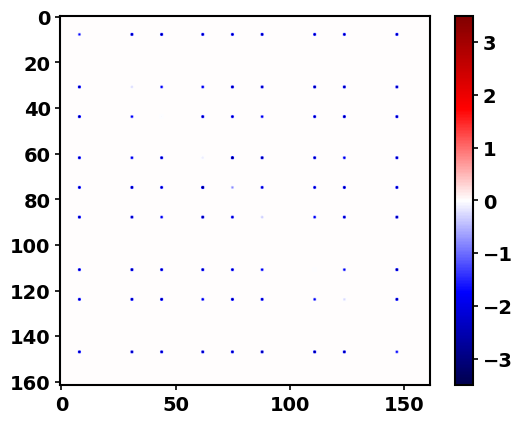

In [57]:
omega = -3
matrix_real = ed_sigma.retarded(omega).real

plt.imshow(matrix_real, cmap='seismic', vmin=-3.5, vmax=3.5)
plt.colorbar()


In [58]:
ed_data_folder = "output/lowdin/ed"
ed_sigma_file = f"{ed_data_folder}/ed_sigma.npy"
ed_sigma = np.load(ed_sigma_file)

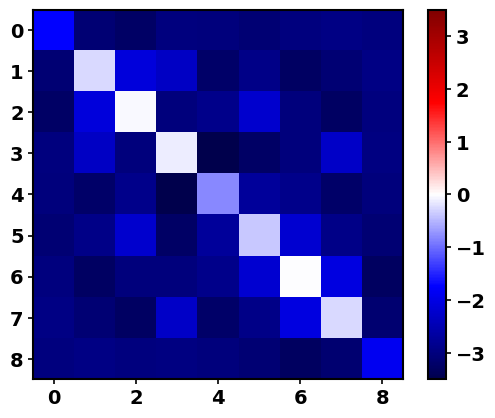

In [59]:
plt.imshow(ed_sigma.real[0], cmap='seismic', vmin=-3.5, vmax=3.5)
plt.colorbar()

In [60]:
output_file = f"{ed_data_folder}/ed_sigma_test.npy"
for i in range(ed_sigma.shape[0]):
    ed_sigma[i] *= np.eye(ed_sigma.shape[1])


np.save(output_file, ed_sigma)

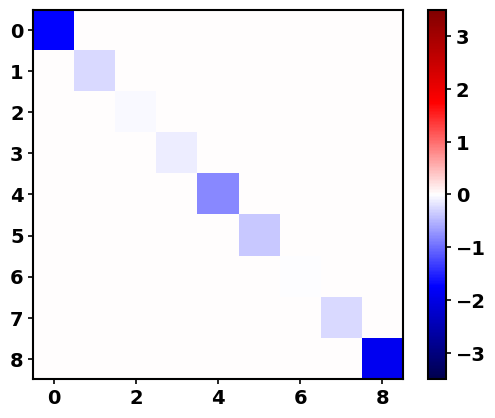

In [61]:
plt.imshow(ed_sigma.real[0], cmap='seismic', vmin=-3.5, vmax=3.5)
plt.colorbar()